# Introduction to Machine Learning — 2024/2025 Supervised Learning

In the following exercises the objective is to program algorithms that, given examples and
an expected output, learn to mimic the behavior present in the data.

In [64]:
# load important packages

import numpy as np
import random
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt



### Exercise 1

The “network” in Fig. 1 represents a perceptron with two inputs and an output that can also be described by the following equations:

    o=f(s), s=w0 +w1 ·x1 +w2 ·x2 
    f(s)=   1, if s>0.5 
            0, if s≤0.5

1. Choose one of the binary operations (AND or OR) and build two vectors: one with all the different input combinations of two bit patterns (4 vectors): where 0 stands for FALSE and 1 for TRUE ; and another vector containing the target / desired response, d, for each of the corresponding input vectors, as result of the chosen operation, namely: OR {0, 1, 1, 1} or AND {0, 0, 0, 1}.

In [22]:
arrayBitPatterns = np.array(((0,0), (0,1), (1,0), (1,1)))

arrayANDSolution = np.array((0,0,0,1))
arrayORSolution = np.array((0,1,1,1))
print(arrayBitPatterns)
print(arrayANDSolution)
print(arrayORSolution)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0 0 0 1]
[0 1 1 1]


2. Initialize w0, w1, and w2 to small random values and, for each input pattern, calculate the corresponding output, storing it in vector o.

In [23]:
def perceptron(w0, w1, w2, arrayBitPatterns):
    listOutputPattern = []
    for bitPair in arrayBitPatterns:
        x1 = bitPair[0]
        x2 = bitPair[1]
        s = w0 + w1 * x1 + w2 * x2
        if s > 0.5:
            listOutputPattern.append(1)
        if s <= 0.5:
            listOutputPattern.append(0)
    return(listOutputPattern)
    

w0 = 0
w1 = 0.2
w2 = 0.2


o = perceptron(w0, w1, w2, arrayBitPatterns)
o

[0, 0, 0, 0]

In [24]:
# oUnderstandable = []
# o = []
# for i in range(10):
#     w0 = round(random.random(), 2)
#     w1 = round(random.random(),2)
#     w2 = round(random.random(), 2)

#     oUnderstandable.append(f"w0: {w0}, w1: {w1}, w2: {w2}, output: {perceptron(w0, w1, w2, arrayBitPatterns)}")
#     o.append(perceptron(w0, w1, w2, arrayBitPatterns))

# print(oUnderstandable)
# print(o)


3. Calculate the difference / error (e = d − o) between the desired response (d) and the output (o), for each output.

In [25]:
d = arrayANDSolution
e = d - o 
e

array([0, 0, 0, 1])

In [14]:
# error = []
# for item in o:
#     e = d - o
#     error.append(e)

# e

array([0, 0, 0, 1])

4. For each error in e, add to the update term for w0 (∆w0), w1 (∆w1), and w2 (∆w2) according to:


    ∆w0 = ∆w0 + α · e

    ∆w1 =∆w1 +α·x1 · e
    
    ∆w2 =∆w2 +α·x2 · e


In [39]:
alpha = 0.0001
w0 = round(random.random(), 2)
w1 = round(random.random(),2)
w2 = round(random.random(), 2)

o = perceptron(w0, w1, w2, arrayBitPatterns)

e = d - o
arrayErrorsAndWeights = np.zeros((4,4))
position = 0
for bitPair in arrayBitPatterns:
    x1 = bitPair[0]
    x2 = bitPair[1]

    if e[position] != 0:
        w0 += alpha * e[position]
        w1 += alpha * e[position] * x1
        w2 += alpha * e[position] * x2

    arrayErrorsAndWeights[position] = [e[position], w0, w1, w2]

    position += 1

arrayErrorsAndWeights

array([[-1.    ,  0.8499,  0.51  ,  0.59  ],
       [-1.    ,  0.8498,  0.51  ,  0.5899],
       [-1.    ,  0.8497,  0.5099,  0.5899],
       [ 0.    ,  0.8497,  0.5099,  0.5899]])

5. Prepare your code to cycle through the whole dataset (in this case, 4 examples) several times doing the above procedure (to train for several "epochs").
6. After all examples are presented (at the end of each epoch), update w0, w1 and w2. so that in the next iteration the error will decrease. Repeat for 20 epochs.

In [71]:
alpha = 0.05
w0 = round(random.random(), 2)
w1 = round(random.random(),2)
w2 = round(random.random(), 2)
numberEpochs = 20
allEpochsArrayErrorAndWeights = np.zeros((numberEpochs, 4, 4))

for i in range(numberEpochs):
    o = perceptron(w0, w1, w2, arrayBitPatterns)

    e = d - o
    arrayErrorsAndWeights = np.zeros((4,4))
    position = 0
    for bitPair in arrayBitPatterns:
        x1 = bitPair[0]
        x2 = bitPair[1]

        if e[position] != 0:
            w0 += alpha * e[position]
            w1 += alpha * e[position] * x1
            w2 += alpha * e[position] * x2

        arrayErrorsAndWeights[position] = [e[position], w0, w1, w2]

        position += 1

    #print(arrayErrorsAndWeights)
    allEpochsArrayErrorAndWeights[i] = arrayErrorsAndWeights

print(allEpochsArrayErrorAndWeights)

[[[ 0.00000000e+00  3.00000000e-01  8.70000000e-01  7.60000000e-01]
  [-1.00000000e+00  2.50000000e-01  8.70000000e-01  7.10000000e-01]
  [-1.00000000e+00  2.00000000e-01  8.20000000e-01  7.10000000e-01]
  [ 0.00000000e+00  2.00000000e-01  8.20000000e-01  7.10000000e-01]]

 [[ 0.00000000e+00  2.00000000e-01  8.20000000e-01  7.10000000e-01]
  [-1.00000000e+00  1.50000000e-01  8.20000000e-01  6.60000000e-01]
  [-1.00000000e+00  1.00000000e-01  7.70000000e-01  6.60000000e-01]
  [ 0.00000000e+00  1.00000000e-01  7.70000000e-01  6.60000000e-01]]

 [[ 0.00000000e+00  1.00000000e-01  7.70000000e-01  6.60000000e-01]
  [-1.00000000e+00  5.00000000e-02  7.70000000e-01  6.10000000e-01]
  [-1.00000000e+00  1.38777878e-17  7.20000000e-01  6.10000000e-01]
  [ 0.00000000e+00  1.38777878e-17  7.20000000e-01  6.10000000e-01]]

 [[ 0.00000000e+00  1.38777878e-17  7.20000000e-01  6.10000000e-01]
  [-1.00000000e+00 -5.00000000e-02  7.20000000e-01  5.60000000e-01]
  [-1.00000000e+00 -1.00000000e-01  6.7000

In [72]:
saveResultsForGraph = allEpochsArrayErrorAndWeights
saveResultsForGraph

array([[[ 0.00000000e+00,  3.00000000e-01,  8.70000000e-01,
          7.60000000e-01],
        [-1.00000000e+00,  2.50000000e-01,  8.70000000e-01,
          7.10000000e-01],
        [-1.00000000e+00,  2.00000000e-01,  8.20000000e-01,
          7.10000000e-01],
        [ 0.00000000e+00,  2.00000000e-01,  8.20000000e-01,
          7.10000000e-01]],

       [[ 0.00000000e+00,  2.00000000e-01,  8.20000000e-01,
          7.10000000e-01],
        [-1.00000000e+00,  1.50000000e-01,  8.20000000e-01,
          6.60000000e-01],
        [-1.00000000e+00,  1.00000000e-01,  7.70000000e-01,
          6.60000000e-01],
        [ 0.00000000e+00,  1.00000000e-01,  7.70000000e-01,
          6.60000000e-01]],

       [[ 0.00000000e+00,  1.00000000e-01,  7.70000000e-01,
          6.60000000e-01],
        [-1.00000000e+00,  5.00000000e-02,  7.70000000e-01,
          6.10000000e-01],
        [-1.00000000e+00,  1.38777878e-17,  7.20000000e-01,
          6.10000000e-01],
        [ 0.00000000e+00,  1.38777878e-

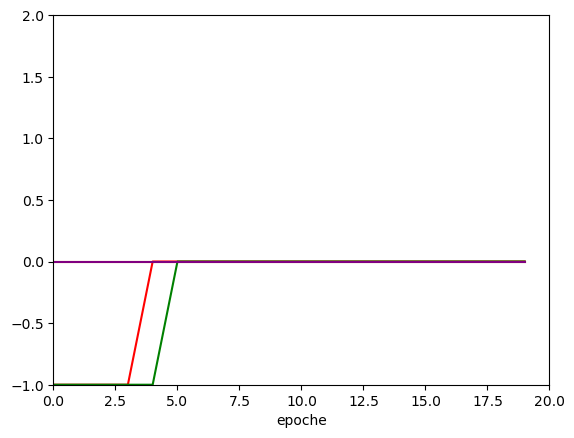

In [74]:
# visualize (a): Plot the value of the error at the end of each epoch, how does it behave?

numberEpochs = range(len(saveResultsForGraph))
numberEpochs

error0 = []
error1 = []
error2 = []
error3 = []

for array in saveResultsForGraph:
    error0.append(array[0,0])
    error1.append(array[1,0])
    error2.append(array[2,0])
    error3.append(array[3,0])

plt.plot(numberEpochs, error0, "-", color = "orange") 
plt.plot(numberEpochs, error1, "-", color = "red") 
plt.plot(numberEpochs, error2, "-", color = "green") 
plt.plot(numberEpochs, error3, "-", color = "purple") 

plt.xlabel("error")
plt.xlabel("epoche")
plt.xlim(0, len(numberEpochs))
plt.ylim(-1, 2)
#plt.axis("equal") 
plt .show()    

### Exercise 2

Implement a k-NN classifier that is specifically suited for the dataset in https://archive.ics.uci.edu/ml/datasets/iris.
Given a dataset containing labelled examples (a training set) and a new example (extracted from the test set), the classifier should calculate the euclidean distance from the new example to all the elements of the training set, choose the k closest elements of the training set and output this example classification as the class of the majority of the k closest training set elements (the k-Nearest Neighbors).

1. Split the dataset randomly in two subsets (70% / 30%). Use the bigger subset as the training set and the smaller as the test set. Run all test examples through the classifier and calculate the number of correct predictions over the total number of examples of the test set. Compare the scores of k-NN classifiers for k = 3, 7, and 11. Repeat 30 times, with different dataset splits, for each value of k. Use a boxplot with whiskers graphic to allow easy comparison.
2. Plot the confusion matrix of one of the tests for each value of k.
3. Considering the dataset presented in Fig. 3, why should k always be an odd number?

In [12]:
coloumnNames = ["sepal length", "sepal width", "petal length", "petal width", "class"]

data = pd.read_csv("data/iris.data", sep = ",", names = coloumnNames)
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
# divide data into input features (y) and output criterion (X)

y = data.loc[:, data.columns != 'class']
X = data.loc[:,'class']

In [22]:
# get seperate train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# split the test data again for final test vs cross validation tests
X_test_for_cross_validation, X_final_test, y_test_for_cross_validation, y_final_test = train_test_split(X_test, y_test, test_size=0.5)


In [19]:
# training data is needed with features and outcomes:
training_data = y_train.join(X_train)
training_data


,sepal length,sepal width,petal length,petal width,class
14,5.8,4.0,1.2,0.2,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
94,5.6,2.7,4.2,1.3,Iris-versicolor
47,4.6,3.2,1.4,0.2,Iris-setosa
...,...,...,...,...,...
37,4.9,3.1,1.5,0.1,Iris-setosa
144,6.7,3.3,5.7,2.5,Iris-virginica
26,5.0,3.4,1.6,0.4,Iris-setosa
120,6.9,3.2,5.7,2.3,Iris-virginica


In [28]:
# define class
class KNearestNeighbourClassifier:

    # constructor
    def __init__(self, trainDataDF, k = None, testDataDF = None, trueLabelsTestDataDF = None):
        self.trainDataDF = trainDataDF
        self.testDataDF = testDataDF
        self.trueLabelsTestDataDF = trueLabelsTestDataDF
        if k==None:
            self.k = self.optimizeK()
        else:
            self.k = k

    def __str__(self):
        return "K Nearest Neighbour Classifier Object"


    # define methods

    def optimizeK(self):
        accuracyForEachK = []
        # loop over all possible k
        for potentialK in range(1,len(self.trainDataDF)+1):
            listOfPredictions = []
            # in each k loop, loop over all test data cases, build a list with the predictions for each case, given the k
            for index, row in self.testDataDF.iterrows():
                functionInput = [row[0], row[1]]
                category = self.predict(functionInput, potentialK)
                listOfPredictions.append(category)
            # calculate the accuracy for each k, save it in a list
            comparison = self.trueLabelsTestDataDF == listOfPredictions
            correctClassifiedCounter= 0
            for item in comparison:
                if item == True:
                    correctClassifiedCounter+=1
            accuracyForEachK.append(correctClassifiedCounter/len(listOfPredictions))
        # choose the key that optimzes the accuracy
        optimizedK = accuracyForEachK.index(max(accuracyForEachK))+1
                
        return(optimizedK)
    

    def predict(self, testDataList, k = None):
        """
        function that returns the predicted/classified category for a new datapoint using old datapoints that have categories, using k-NN logic.

        Parameters
        ---------------
        trainDataDF: pd. Data frame with two input features and one output category
        k: number of closest datapoint that the category should be dirived from
        testDataList: list with two integers (that represent the feature 1 and 2 attribute)

        Returns
        ---------------
        category: string with predicted category
            
        """
    
        # initiate dict and two list to hold information, which we will need to save for further processes
        dictToSaveDistances = {}
        kMinIndexes = []
        categoriesOfMinDistanceEntries = []

        # calculate distance (helper function) from every old data point to new datapoint and save distances as values in dictionary where their index is the key (to identify later)
        for index, row in self.trainDataDF.iterrows():
            dictToSaveDistances[index] = self.__getEuclideanDistance(row, testDataList)

        # Either use the k passed to this function, or the one prepared when instantiating a classifier
        chosenK = [self.k if k == None else k][0]

        # identify k min distances and save indexes of those in a list 
        for i in range(chosenK):
            MinKey = min(dictToSaveDistances, key = dictToSaveDistances.get)
            kMinIndexes.append(MinKey)
            del dictToSaveDistances[MinKey]

        # for each of the indexes of k minimal distances, retrieve category and save in list
        for i in kMinIndexes:
            categoriesOfMinDistanceEntries.append(self.trainDataDF["outcome"].loc[i])
        
        # retrieve most common category from k min distance cases, and return it as predicted category
        category = max(categoriesOfMinDistanceEntries,key=categoriesOfMinDistanceEntries.count)
        return(category)
    
    # helper function: calculate euclidean distance with 2 coordinates of the train and two coordinates of the test data 
    ### todo: can I generalize the function to take in any input coordinate length?!
    @staticmethod
    def __getEuclideanDistance(point1, point2):
        point1 = np.array(point1)
        point2 = np.array(point2)

        distance = np.sqrt(np.sum((point1 - point2) ** 2))

        return(distance)



# test
model1 = KNearestNeighbourClassifier(trainDataDF = training_data, testDataDF = y_test_for_cross_validation, trueLabelsTestDataDF = X_test_for_cross_validation)
model2 = KNearestNeighbourClassifier(trainDataDF = training_data, k=15)


print(model1.predict(y_final_test[1]))
print(model2.predict(y_final_test[1]))
print(X_final_test[1])

/var/folders/jp/7rxct1gj4xsc_51ldxz05w9w0000gn/T/ipykernel_7834/2586032591.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  functionInput = [row[0], row[1]]


ValueError: operands could not be broadcast together with shapes (5,) (2,) 

In [26]:
def geted(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)

    distance = np.sqrt(np.sum((point1 - point2) ** 2))

    return(distance)

geted([1, 1, 1], [5, 2, 6])

6.48074069840786

In [1]:
import ucimlrepo

/Users/ellaalle/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 

# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [6]:
type(iris)

ucimlrepo.dotdict.dotdict